In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd



data=pd.read_csv('./PHY204_EXPDATA.csv', sep=';')
data.iloc[:, 1] = data.iloc[:, 1].str.replace(',', '.').astype(float)
# Define the function z(m) based on your expression

# Known constants (Replace these with your actual values)
a = 1.5e-2  # Replace with actual value of a
b = 12e-2  # Replace with actual value of b
mu_0 = 4 * np.pi * 1e-7  # Magnetic constant
g = 9.81  # Gravitational constant
m0=62e-3
um=1e-3 #uncertainty on mass
uz=0.5e-3 #uncertainty on height

# Load the experimental data for z and m
# Replace these arrays with your actual data
m_data = data.iloc[:,0]*1e-3 # Example mass data
z_data = data.iloc[:,1]*1e-3

uz = np.full_like(z_data, uz)


Estimated coefficient p: -13.714155762094597
Estimated intercept q: 0.7014039357975762
R-squared: 0.9584729032028138
[0.05165196 0.05154846 0.05104547 0.05056231 0.0499302  0.04942009
 0.0488344  0.0474183  0.04700964 0.04700964 0.04657775 0.04345267
 0.04283415 0.04218485 0.04078882 0.0392534  0.0392534  0.03842941
 0.03842941 0.03756547 0.03665955 0.03471265 0.03256785 0.02892063]


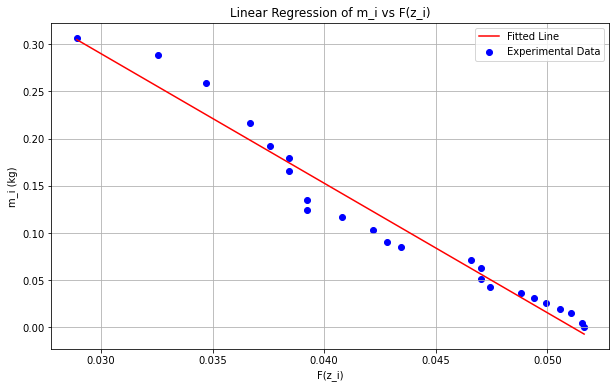

In [51]:
import numpy as np
from scipy.optimize import minimize, root
from scipy.odr import polynomial
from scipy import stats
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # H/m
g = 9.81  # m/s^2

# Experimental data (in SI units)
m_exp = np.array([0, 5, 15, 20, 26, 31, 36, 43, 51, 63, 71, 85, 90, 103, 117, 124, 135, 166, 180, 192, 217, 259, 289, 307, 322]) * 1e-3  # kg
z_exp = np.array([5, 4.8, 4.3, 4, 3.7, 3.5, 3.3, 2.9, 2.8, 2.8, 2.7, 2.1, 2, 1.9, 1.7, 1.5, 1.5, 1.4, 1.4, 1.3, 1.2, 1, 0.8, 0.5, 0]) * 1e-3  # m


# Fixed geometry parameters
a = 0.015  # m
b = 0.12   # m
m0 = 62e-3  # kg
delta=0.8e-3 #m

def A(z):
    return np.sqrt(a**2 + z**2)

def B(z):
    return np.sqrt(b**2 + z**2)

def Fbar(z):
    """Original complicated F̄(z) function"""
    return (1/(a**2+b**2))*(z * (a * np.arcsinh(a / z) + b * np.arcsinh(b / z) - a * np.arcsinh(a / B(z)) - b * np.arcsinh(b / A(z))) +
            a * b * (np.arctan(z / a) - np.arctan(z / b)) - 
            2 * (a**2) * np.arctan(a * (np.sqrt(a**2 + b**2 + z**2) - np.sqrt(a**2 + b**2)) / (z * (b + np.sqrt(a**2 + b**2)))) -
            z * (A(z) + B(z) - z - np.sqrt(a**2 + b**2 + z**2)) - 
            2 * (b**2) * np.arctan(b * (np.sqrt(a**2 + b**2 + z**2) - np.sqrt(a**2 + b**2)) / (z * (a + np.sqrt(a**2 + b**2)))))

# Exclude the data point where z = 0 to avoid division by zero
mask = z_exp != 0
z_exp_nonzero = z_exp[mask]+delta#
m_exp_nonzero = m_exp[mask]

# Compute Fbar(z_i) for each z_i
Fbar_values = np.array([Fbar(z) for z in z_exp_nonzero])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Fbar_values, m_exp_nonzero)

# Extract p and q
p = slope
q = intercept

print(f"Estimated coefficient p: {p}")
print(f"Estimated intercept q: {q}")
print(f"R-squared: {r_value**2}")
print(Fbar_values)
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Fbar_values, m_exp_nonzero, label='Experimental Data', color='blue')
plt.plot(Fbar_values, p * Fbar_values+q, label='Fitted Line', color='red')
plt.xlabel('F̄(z_i)')
plt.ylabel('m_i (kg)')
plt.title('Linear Regression of m_i vs F̄(z_i)')
plt.legend()
plt.grid(True)
plt.show()




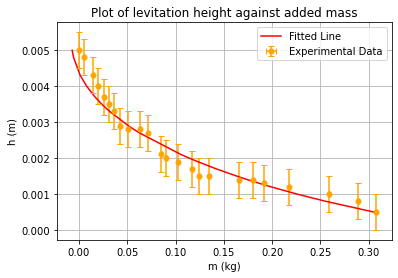

In [52]:
plt.plot(p * Fbar_values+q ,z_exp_nonzero-delta, label='Fitted Line', color='red')
plt.errorbar(m_data[:-1], z_data[:-1], xerr=um, yerr=uz[:-1], fmt='o', markersize=5, capsize=3, label='Experimental Data', color='orange')
plt.xlabel('m (kg)')
plt.ylabel('h (m)')
plt.title('Plot of levitation height against added mass')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
ss_res = np.sum((m_exp_nonzero - (p*Fbar_values+q)) ** 2)
ss_tot = np.sum((m_exp_nonzero - np.mean(m_exp_nonzero)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R^2 of the fit: {r_squared}")


R^2 of the fit: 0.9584729032028138


75296.29387566628 941.2036734458285
470804326.56647134 79530.7243846296


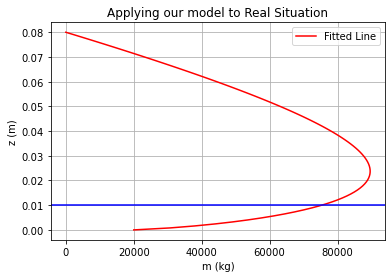

In [67]:

a = 0.06  # m
b = 153   # m
m0 = 20e3 # kg
delta_r=1.4e-3 #m
z0=0.08
z_real = np.linspace(1e-10,z0,100)
m_real=np.linspace(0,100e3,100)


# Compute Fbar(z_i) for each z_i
Fbar_real_values = Fbar(z_real)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Fbar_real_values, m_real)

# Extract p and q
p = -m0/Fbar(z0)
q = intercept
zc=0.01
mc=p*Fbar(zc)+m0
print(mc,mc/80)
print(p,q)
plt.plot(p * Fbar_real_values+m0 ,z_real, label='Fitted Line', color='red')
plt.axhline(y=zc, color='b', linestyle='-')
#plt.errorbar(m_data, z_data, xerr=um, yerr=uz, fmt='o', markersize=5, capsize=3, label='Experimental Data', color='orange')
plt.xlabel('m (kg)')
plt.ylabel('z (m)')
plt.title('Applying our model to Real Situation')
plt.legend()
plt.grid(True)
plt.show()

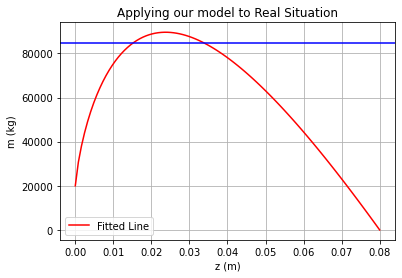

In [64]:
plt.plot(z_real,p * Fbar_real_values+m0 , label='Fitted Line', color='red')
plt.axhline(y=mc, color='b', linestyle='-')
#plt.errorbar(m_data, z_data, xerr=um, yerr=uz, fmt='o', markersize=5, capsize=3, label='Experimental Data', color='orange')
plt.ylabel('m (kg)')
plt.xlabel('z (m)')
plt.title('Applying our model to Real Situation')
plt.legend()
plt.grid(True)
plt.show()